In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("Social_Network_Ads.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
df = df.drop(["User ID"], axis=1)
df = df.drop(["Gender"], axis=1)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Train test split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop("Purchased", axis = 1),
                                                    df["Purchased"], 
                                                    test_size = 0.3,
                                                    random_state = 0)

x_train.shape, x_test.shape

((280, 2), (120, 2))

StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler data to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [19]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [20]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [21]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [22]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of Scaling

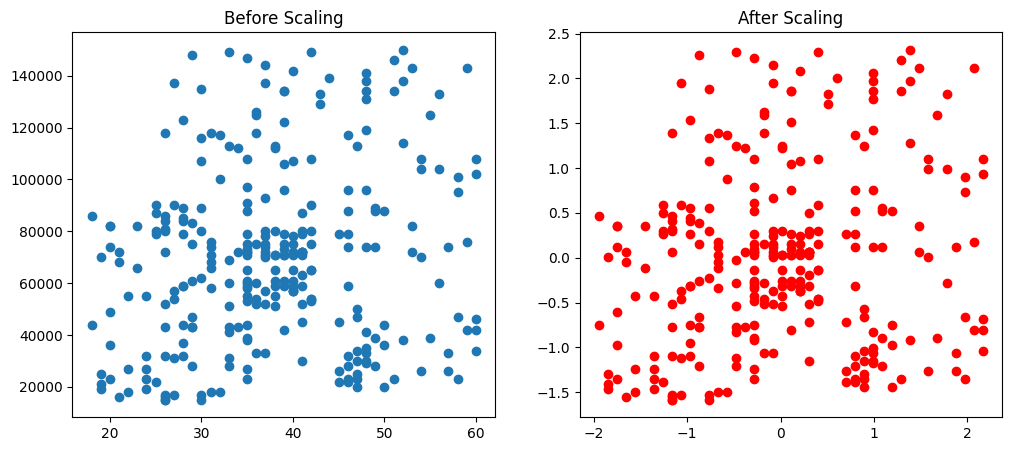

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
ax1.scatter(x_train["Age"], x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Age"], x_train_scaled["EstimatedSalary"], color = "red")
ax2.set_title("After Scaling")
plt.show()

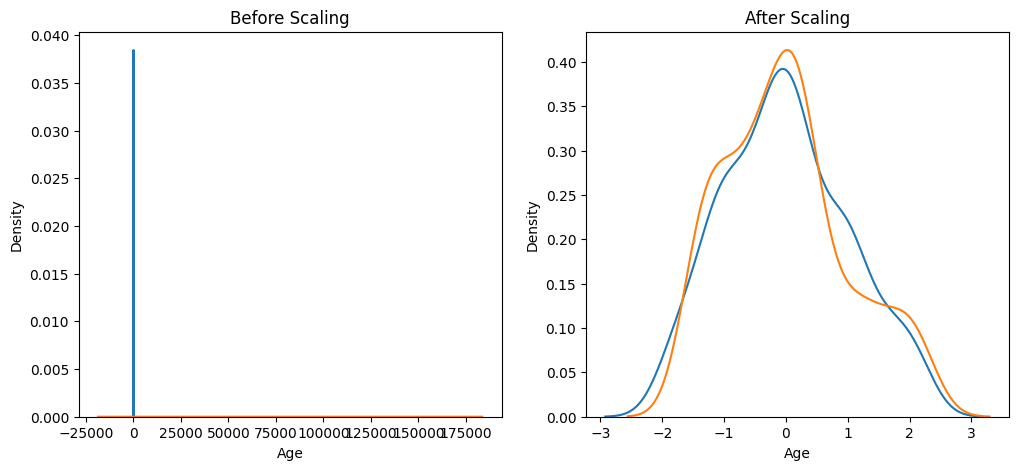

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Age"], ax = ax1)
sns.kdeplot(x_train["EstimatedSalary"], ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled["Age"], ax = ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"], ax = ax2)
plt.show()

Comparison of #df is your dataframe
df.ColumnName.value_counts(ascending = True)

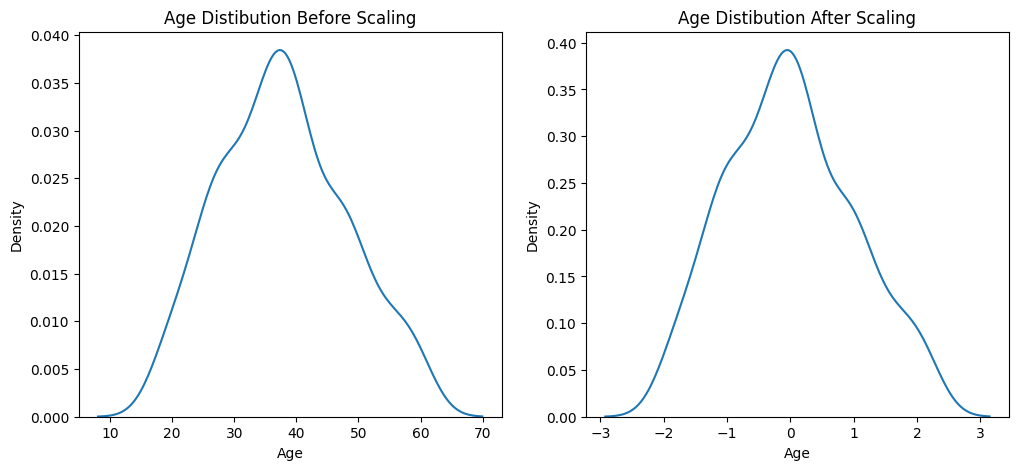

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Age Distibution Before Scaling")
sns.kdeplot(x_train["Age"], ax = ax1)

ax2.set_title("Age Distibution After Scaling")
sns.kdeplot(x_train_scaled["Age"], ax = ax2)
plt.show()

Why scaling is important ?

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [30]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [31]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [34]:
from sklearn.tree import DecisionTreeClassifier


In [36]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [37]:
dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)


In [39]:
print ("Actual", accuracy_score(y_test, y_pred))
print ("Scaled", accuracy_score(y_test, y_pred_scaled))


Actual 0.875
Scaled 0.8666666666666667


In [40]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [44]:
df = pd.concat([df, pd.DataFrame({"Age": [5, 90, 95], "EstimatedSalary": [1000, 250000, 350000], "Purchased": [0, 1, 1]})], ignore_index=True)


In [45]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


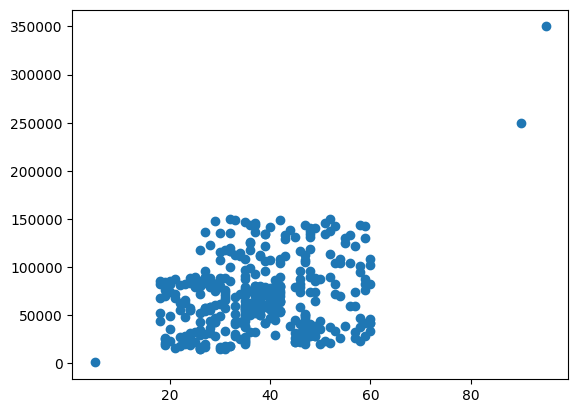

In [46]:
plt.scatter(df["Age"], df["EstimatedSalary"])

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop("Purchased", axis = 1),
                                                    df["Purchased"], 
                                                    test_size = 0.3,
                                                    random_state = 0)

x_train.shape, x_test.shape

((282, 2), (121, 2))

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [49]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


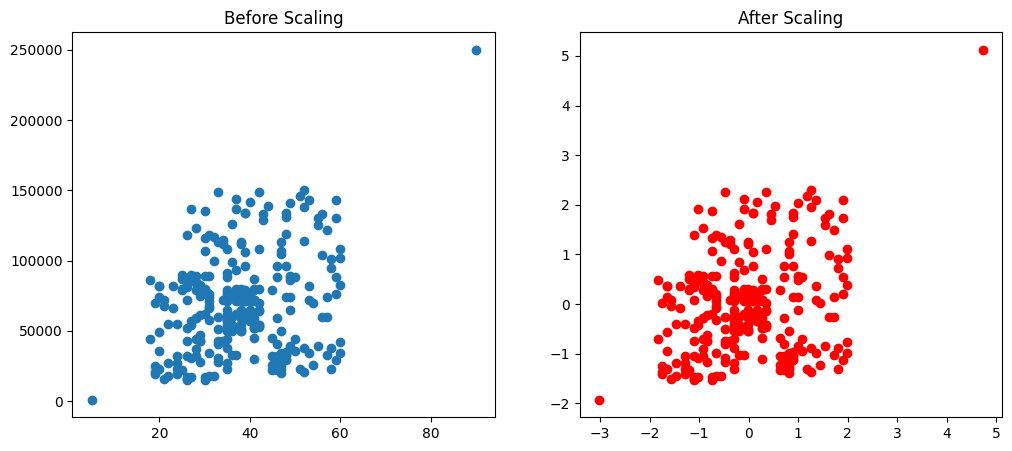

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(x_train["Age"], x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Age"], x_train_scaled["EstimatedSalary"], color = "red")
ax2.set_title("After Scaling")
plt.show()